In [16]:
%run trainer.ipynb

In [17]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import time
import csv
import numpy
import random

# Model Def

In [ ]:
class FCN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.view(-1, 28*28)
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Training

In [18]:
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100

In [19]:
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)
test_dataset = dsets.MNIST(root='./data',
                            train=False,
                            transform=transforms.ToTensor())

In [20]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                            batch_size=batch_size,
                                            shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                            batch_size=batch_size,
                                            shuffle=False)

## SLR

In [22]:
model_s = FCN(input_size, hidden_size, num_classes).cuda()

In [23]:
learning_rate = 0.075  

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model_s.parameters(), lr=learning_rate)

In [25]:
slr_op = train_slr(model_s, train_loader, test_loader, criterion, optimizer, num_epochs)

Epoch: 0


Accuracy of the network for this batch: 93.0183 %
Epoch: 1
Accuracy of the network for this batch: 97.0283 %
Epoch: 2
Accuracy of the network for this batch: 97.9550 %
Epoch: 3
Accuracy of the network for this batch: 98.4283 %
Epoch: 4
Accuracy of the network for this batch: 98.8083 %
Epoch: 5
Accuracy of the network for this batch: 99.1083 %
Epoch: 6
Accuracy of the network for this batch: 99.2950 %
Epoch: 7
Accuracy of the network for this batch: 99.4517 %
Epoch: 8
Accuracy of the network for this batch: 99.6117 %
Epoch: 9
Accuracy of the network for this batch: 99.6883 %


## DLR

In [26]:
correct_learning_rate = 0.075           
cor_lr_change = correct_learning_rate * 0
incorrect_learning_rate = 0.025          
incor_lr_change = incorrect_learning_rate * 0

In [27]:
model_d = FCN(input_size, hidden_size, num_classes).cuda()

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model_d.parameters(), lr=correct_learning_rate)

In [29]:
params = {'cor_lr': correct_learning_rate, 
          'cor_lr_change': cor_lr_change, 
          'incor_lr': incorrect_learning_rate, 
          'incor_lr_change': incor_lr_change,
          'cor_min': 19995,
          'cor_max': 20005,
          'incor_min': 67,
          'incor_max': 72,}

In [30]:
dlr_op = train_dlr(model_d, train_loader, test_loader, criterion, optimizer, batch_size, params, num_epochs)

Epoch: 0
Accuracy of the network for this batch: 93.4033 %
Epoch: 1
Accuracy of the network for this batch: 97.6767 %
Epoch: 2
Accuracy of the network for this batch: 98.6567 %
Epoch: 3
Accuracy of the network for this batch: 99.0600 %
Epoch: 4
Accuracy of the network for this batch: 99.4117 %
Epoch: 5
Accuracy of the network for this batch: 99.6517 %
Epoch: 6
Accuracy of the network for this batch: 99.8000 %
Epoch: 7
Accuracy of the network for this batch: 99.8833 %
Epoch: 8
Accuracy of the network for this batch: 99.9183 %
Epoch: 9
Accuracy of the network for this batch: 99.9583 %


# Comparison

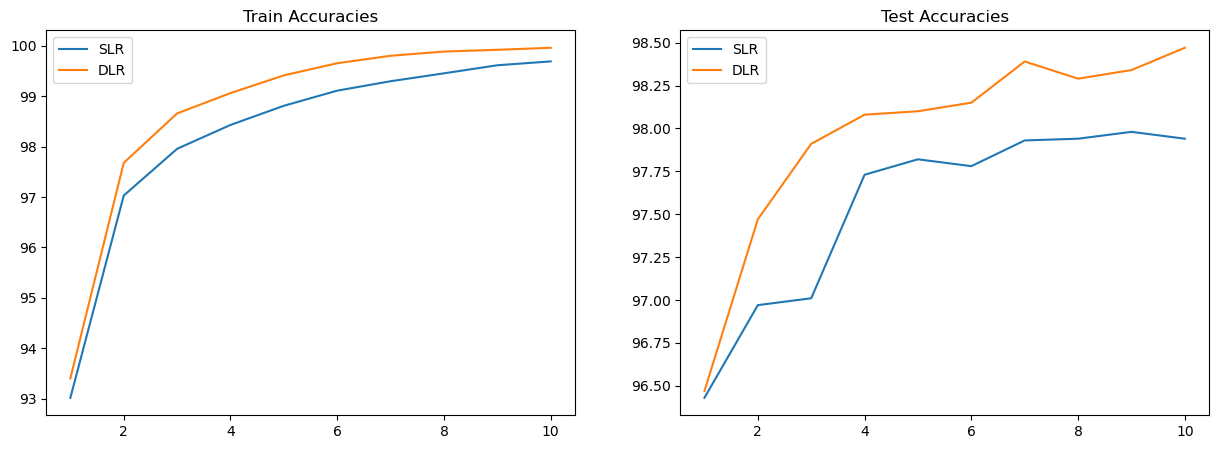

In [31]:
epoch_range = range(1, 11)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# plt.figure(211)
ax[0].plot(epoch_range, slr_op['train_acc'], label='SLR')
ax[0].plot(epoch_range, dlr_op['train_acc'], label='DLR')
ax[0].set_title("Train Accuracies")
ax[0].legend()
# ax[0].show()

# plt.figure(212)
ax[1].plot(epoch_range, slr_op['test_acc'], label='SLR')
ax[1].plot(epoch_range, dlr_op['test_acc'], label='DLR')
ax[1].set_title("Test Accuracies")
ax[1].legend()
# ax[1].show()

In [33]:
model_d

FCN(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)